In [2]:
!poetry add ucimlrepo

The following packages are already present in the pyproject.toml and will be skipped:

  - ucimlrepo

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
students = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = students.data.features 
y = students.data.targets 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Transformación de los datos en un dataframe de pandas

df = pd.DataFrame(X, columns=students.variables.name[:-1])
df['Target'] = y

# Visualización de los primeros registros
df.head()

name,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [9]:
df.isnull().sum()

name
Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at 

In [10]:
df=df.drop_duplicates()
df

name,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [11]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [12]:
(df['Target']!='Dropout').value_counts()

Target
True     3003
False    1421
Name: count, dtype: int64

In [13]:
### Análisis de las variables numéricas

# Estadísticas descriptivas de las variables numéricas

df.describe()

name,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [14]:
### Análisis de las variables categóricas

# Estadísticas descriptivas de las variables categóricas

df.describe(include='object')

name,Target
count,4424
unique,3
top,Graduate
freq,2209


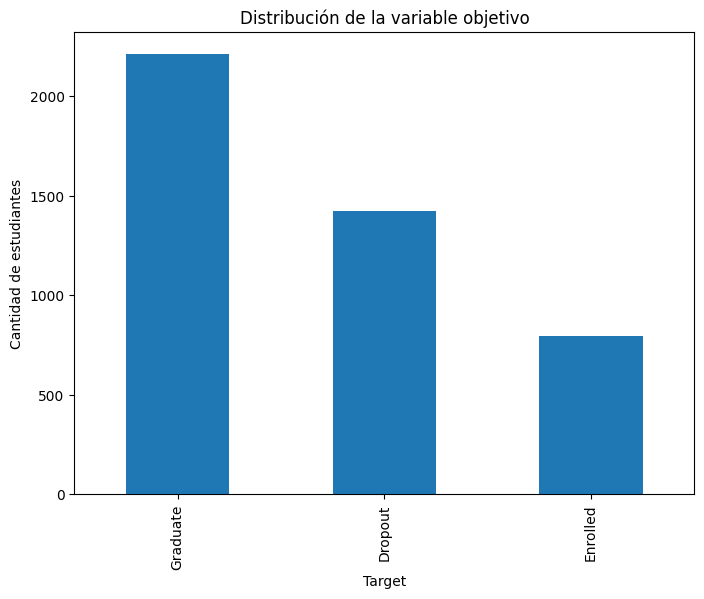

In [16]:
### Visualización de la variable objetivo

# Gráfico de barras de la variable objetivo

plt.figure(figsize=(8, 6))
plt.title('Distribución de la variable objetivo')
plt.xlabel('Dropout')
plt.ylabel('Cantidad de estudiantes')
df['Target'].value_counts().plot(kind='bar')
plt.show()

In [17]:
!poetry add scikit-learn

The following packages are already present in the pyproject.toml and will be skipped:

  - scikit-learn

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


In [18]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


# Separación de las variables predictoras y la variable objetivo

X = df.drop('Target', axis=1)
y = df['Target']

## Particionar el DataSet 

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2025)

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(3539, 36)
(885, 36)
(885,)
(3539,)


In [19]:

columnas_numericas = X.select_dtypes(exclude='object').columns
columnas_numericas

Index(['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [21]:
columnas_categoricas = X.select_dtypes(include='object').columns
columnas_categoricas

Index([], dtype='object', name='name')

In [22]:
### Definimos los pasos para el preprocesamiento de los datos

transfomacion_OHE = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
##No contamos con NA y no hay variables categoricas 

In [23]:
### Normalización de las variables numéricas

transformacion_escalar = StandardScaler()

pd.DataFrame(transformacion_escalar.fit_transform(X[columnas_numericas])).describe()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
count,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4424.000000,...,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03
mean,-9.636656e-18,-1.477621e-16,-1.043971e-16,2.288706e-16,7.066881e-17,-2.087942e-17,-3.589654e-16,2.409164e-17,-5.781993e-17,0.000000,...,9.636656e-18,-3.212219e-18,1.646262e-16,-8.994212e-17,-1.509743e-16,3.212219e-17,3.212219e-18,-5.460771e-17,1.445498e-16,2.569775e-17
std,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113,...,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00
min,-2.948287e-01,-1.010660e+00,-1.315309e+00,-4.276402e+00,-2.856470e+00,-3.502305e-01,-2.852337e+00,-1.262982e-01,-1.189759e+00,-1.386793,...,-1.992730e-01,-2.824423e-01,-2.838337e+00,-2.042630e+00,-1.471527e+00,-1.963489e+00,-1.994410e-01,-1.489043e+00,-1.466871e+00,-1.789667e+00
25%,-2.948287e-01,-1.010660e+00,-5.540678e-01,1.106740e-01,3.500825e-01,-3.502305e-01,-5.773417e-01,-1.262982e-01,-1.125662e+00,-1.256427,...,-1.992730e-01,-2.824423e-01,-5.611611e-01,-5.226824e-01,-8.080500e-01,9.976438e-02,-1.994410e-01,-8.132529e-01,-6.712423e-01,-7.498721e-01
50%,-2.948287e-01,-9.547022e-02,-5.540678e-01,1.848259e-01,3.500825e-01,-3.502305e-01,3.690696e-02,-1.262982e-01,-3.601818e-02,-0.213496,...,-1.992730e-01,-2.824423e-01,-1.057260e-01,-1.603320e-02,1.871653e-01,3.780636e-01,-1.994410e-01,-1.750068e-01,1.243865e-01,1.401217e-01
75%,-2.948287e-01,1.162916e+00,2.071732e-01,3.389454e-01,3.500825e-01,-3.502305e-01,5.601559e-01,-1.262982e-01,1.117723e+00,0.959802,...,-1.992730e-01,-2.824423e-01,3.497091e-01,4.906160e-01,5.189037e-01,5.955849e-01,-1.994410e-01,8.762221e-01,9.923451e-01,7.877904e-01
max,7.960376e+00,2.192505e+00,5.535860e+00,5.497694e-01,3.500825e-01,3.761194e+00,4.351815e+00,1.549479e+01,1.566400e+00,1.416085,...,1.717184e+01,9.622009e+00,7.636671e+00,6.317081e+00,5.163242e+00,1.600935e+00,1.572225e+01,1.739731e+00,1.787974e+00,1.545607e+00


In [25]:
### Transformación de las variables
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Creación de los pasos para el preprocesamiento
##Defino el tratamiento en varialbes categoricas

transformacion_nan=SimpleImputer(strategy='constant', fill_value='?')

transfomacion_OHE=OneHotEncoder(sparse_output=False,handle_unknown='ignore')


##Tratamiento varialbes numericas

transformacion_escalar=StandardScaler()
pasos_numericas=[('normalizacion_escalar',)]


pipeline_numerico=Pipeline(pasos_numericas)


# Creación del preprocesador

Transformacion_Columnas = ColumnTransformer(
    transformers=[
        ('Tratamiento_numerico', transformacion_escalar, columnas_numericas)
    ])

Transformacion_Columnas.fit(X)

pd.DataFrame(Transformacion_Columnas.transform(X)).head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,-0.294829,-0.095470,2.490896,-4.209520,0.350082,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,...,-0.199273,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761
1,-0.294829,-0.209869,-0.554068,0.192580,0.350082,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,...,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199
2,-0.294829,-1.010660,2.490896,0.103404,0.350082,-0.35023,-0.804841,-0.126298,1.117723,0.959802,...,-0.199273,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761
3,-0.294829,-0.095470,0.207173,0.444115,0.350082,-0.35023,-0.804841,-0.126298,1.181819,0.959802,...,-0.199273,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511
4,1.356212,1.162916,-0.554068,-0.408389,-2.856470,-0.35023,-2.473171,-0.126298,1.117723,1.024985,...,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199


In [26]:
Transformacion_Columnas.fit(X_train)

Transformacion_Columnas.transform(X_train)

array([[-0.30047422, -1.00094912, -0.55556642, ..., -0.28360922,
         0.11677594,  0.7686065 ],
       [-0.30047422, -1.00094912,  1.71219547, ...,  0.43076304,
         1.77331332, -0.75246887],
       [ 1.34562215,  1.17723563,  0.20035421, ...,  0.43076304,
         1.77331332, -0.75246887],
       ...,
       [-0.30047422, -0.0838187 ,  0.20035421, ..., -0.99798147,
         0.11677594,  1.55125284],
       [-0.30047422,  1.40651824,  1.71219547, ..., -1.48676249,
         0.98105631,  0.14072074],
       [-0.30047422, -0.0838187 ,  0.20035421, ...,  0.88194552,
        -1.10762125,  0.34854208]], shape=(3539, 36))

In [28]:
import joblib 

joblib.dump(Transformacion_Columnas, 'preprocesador.gz')

['preprocesador.gz']

In [29]:
new_column_transformer = joblib.load('preprocesador.gz')
new_column_transformer

ColumnTransformer(transformers=[('Tratamiento_numerico', StandardScaler(),
                                 Index(['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Dis...
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP'],
      dtype='object', name='name'))])

In [30]:
columnas_numericas=Transformacion_Columnas.transformers_[0][2]
columnas_numericas

Index(['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [33]:
### Entrenamos varios modelos random forest para decidir si una persona gana mas de 50k y escogeremos el mejor modelo.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Separación de los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creación del modelo

parametros = {'n_estimators': [100, 200, 500],
                'max_depth': [5, 10,  20],
                'min_samples_split': [5, 10,  20],
                'min_samples_leaf': [1, 2, 10]}

modelo = RandomForestClassifier(random_state=42)


# Búsqueda de los mejores hiperparámetros

grid = GridSearchCV(modelo, param_grid=parametros, cv=5, n_jobs=-1)

grid.fit(Transformacion_Columnas.transform(X_train), y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 10],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [100, 200, 500]})

In [34]:
## Evaluación del modelo

best_model = grid.best_estimator_
print('Mejores hiperparámetros:', grid.best_params_)

## Predicciones
y_pred = best_model.predict(Transformacion_Columnas.transform(X_test))

print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}
Accuracy: 0.7673192771084337

Classification Report:
               precision    recall  f1-score   support

     Dropout       0.82      0.78      0.80       441
    Enrolled       0.58      0.29      0.39       245
    Graduate       0.77      0.94      0.85       642

    accuracy                           0.77      1328
   macro avg       0.72      0.67      0.68      1328
weighted avg       0.75      0.77      0.75      1328


Confusion Matrix:
 [[344  26  71]
 [ 64  71 110]
 [ 13  25 604]]


In [35]:
### Guardamos el mejor modelo

joblib.dump(best_model, 'mejor_modelo.gz')

### Crear un pipeline para preprocesar los datos, entrenar el modelo y predecir nuevos datos

from sklearn.pipeline import Pipeline

# Creación del pipeline

pipeline = Pipeline(steps=[('preprocesador', Transformacion_Columnas),
                            ('modelo', best_model)])

# Entrenamiento del pipeline

pipeline.fit(X_train, y_train)

# Predicción de nuevos datos

nuevos_datos = X_test[:5]

pipeline.predict(nuevos_datos)

array(['Dropout', 'Graduate', 'Graduate', 'Graduate', 'Dropout'],
      dtype=object)

In [36]:
pipeline

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('Tratamiento_numerico',
                                                  StandardScaler(),
                                                  Index(['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's...
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP'],
      dtype='object', name='name'))])),
                ('modelo',
                 RandomForestClassifier(max_depth=20, min_samples_leaf=2,
                                        min_samples_split=5, n_estimators=500,
                                        random_state=42))])

In [37]:
### Guardamos el pipeline

joblib.dump(pipeline, 'pipeline_total.gz')

['pipeline_total.gz']

In [38]:
nuevos_datos.to_json()

'{"Marital Status":{"1255":4,"3458":1,"3390":1,"1497":1,"1536":1},"Application mode":{"1255":39,"3458":17,"3390":17,"1497":17,"1536":39},"Application order":{"1255":1,"3458":1,"3390":1,"1497":2,"1536":1},"Course":{"1255":9130,"3458":9238,"3390":9853,"1497":9670,"1536":9500},"Daytime\\/evening attendance":{"1255":1,"3458":1,"3390":1,"1497":1,"1536":1},"Previous qualification":{"1255":1,"3458":1,"3390":1,"1497":1,"1536":1},"Previous qualification (grade)":{"1255":133.1,"3458":125.0,"3390":133.0,"1497":110.0,"1536":130.0},"Nacionality":{"1255":1,"3458":1,"3390":1,"1497":1,"1536":1},"Mother\'s qualification":{"1255":3,"3458":4,"3390":38,"1497":1,"1536":37},"Father\'s qualification":{"1255":1,"3458":3,"3390":38,"1497":1,"1536":19},"Mother\'s occupation":{"1255":5,"3458":1,"3390":9,"1497":4,"1536":9},"Father\'s occupation":{"1255":5,"3458":1,"3390":9,"1497":10,"1536":8},"Admission grade":{"1255":110.0,"3458":119.8,"3390":127.4,"1497":115.3,"1536":106.2},"Displaced":{"1255":1,"3458":0,"3390":

In [39]:
modelo=joblib.load('pipeline_total.gz')
modelo

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('Tratamiento_numerico',
                                                  StandardScaler(),
                                                  Index(['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's...
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP'],
      dtype='object', name='name'))])),
                ('modelo',
                 RandomForestClassifier(max_depth=20, min_samples_leaf=2,
                                        min_samples_split=5, n_estimators=500,
                                        random_state=42))])

In [40]:
datos_testeo=X.sample(1)
datos_testeo

name,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
2956,1,7,1,9500,1,3,130.0,1,37,37,...,7,0,7,7,0,0.0,7,16.2,0.3,-0.92


In [41]:
datos_json = {
    "name": [2956],
    "Marital Status": [1],
    "Application mode": [7],
    "Application order": [1],
    "Course": [9500],
    "Daytime/evening attendance": [1],
    "Previous qualification": [3],
    "Previous qualification (grade)": [130.0],
    "Nacionality": [1],
    "Mother's qualification": [37],
    "Father's qualification": [37],
    "Curricular units 1st sem (without evaluations)": [7],
    "Curricular units 2nd sem (credited)": [0],
    "Curricular units 2nd sem (enrolled)": [7],
    "Curricular units 2nd sem (evaluations)": [7],
    "Curricular units 2nd sem (approved)": [0],
    "Curricular units 2nd sem (grade)": [0.0],
    "Curricular units 2nd sem (without evaluations)": [7],
    "Unemployment rate": [16.2],
    "Inflation rate": [0.3],
    "GDP": [-0.92]
}
datos_transformados = {k: v["3419"] for k, v in datos_json.items()}
datos_transformados

TypeError: list indices must be integers or slices, not str